# Second Restarted IPYNB

In [33]:
import os
import sys 
# mathematical operations imports
import pandas as pd 
import numpy as np
#visualisation imports
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import seaborn as sns
# modelling imports
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


# Data Loading

In [34]:
cwd = os.getcwd()

print(f"Current working directory: {cwd}")

Current working directory: /Users/saikeerthan/NYP-AI/Year3/Big_Data/restarted_big_data


In [35]:
employee_df = pd.read_csv(os.path.join(cwd, 'Employee_dataset.csv'))

employee_df

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19.0,94.0
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12.0,35.0
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16.0,81.0
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6.0,5.0


In [36]:
employee_salary = pd.read_csv(os.path.join(cwd, 'Employee_salaries.csv'))

employee_salary

,jobId,salaryInThousands
0,JOB1362684407687,130.0
1,JOB1362684407688,101.0
2,JOB1362684407689,137.0
3,JOB1362684407690,142.0
4,JOB1362684407691,163.0
...,...,...
999995,JOB1362685407682,88.0
999996,JOB1362685407683,160.0
999997,JOB1362685407684,64.0
999998,JOB1362685407685,149.0


`jobId` column is the same for both the datasets, and since the overall objective of the model is to predict the salary, we will merge these two datasets together to create a master_dataset where we can then perform Data Cleaning 

In [37]:
master_dataset = pd.merge(employee_df, employee_salary, on='jobId', how='inner') # use inner to keep only rows with matching jobId in both datasets

master_dataset

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10.0,83.0,130.0
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3.0,73.0,101.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1023086,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19.0,94.0,88.0
1023087,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12.0,35.0,160.0
1023088,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16.0,81.0,64.0
1023089,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6.0,5.0,149.0


## Data Cleaning 

### Check for Missing Values and Duplicated

In [38]:
# check for missing values 

master_nan = master_dataset.isnull().sum()

print("Missing values in each column:\n", master_nan)
print("\n")
print("Total missing values in the dataset:",master_nan.sum())

Missing values in each column:
 jobId                23415
companyId            23236
jobRole              18813
education            18168
major                17079
industry             15754
yearsExperience      14184
distanceFromCBD      13042
salaryInThousands    23421
dtype: int64


Total missing values in the dataset: 167112


In [39]:
# calculate percentage of missing values in correlation to whole df 

percentage = (master_nan / master_dataset.size) * 100
print("Percentage of missing values: \n", percentage)

Percentage of missing values: 
 jobId                0.254295
companyId            0.252351
jobRole              0.204315
education            0.197311
major                0.185484
industry             0.171094
yearsExperience      0.154043
distanceFromCBD      0.141640
salaryInThousands    0.254360
dtype: float64


Since the percentages amount to almost lesser than 2%, dropping these rows will not cause any major data loss and will still uphold data integrity pretty well.

In [40]:
# remove missing values in master dataset

master_dataset = master_dataset.dropna()
print("Missing values after dropping:\n", master_dataset.isnull().sum())
print("\n")
print("New Size of the dataset:", master_dataset.shape)

Missing values after dropping:
 jobId                0
companyId            0
jobRole              0
education            0
major                0
industry             0
yearsExperience      0
distanceFromCBD      0
salaryInThousands    0
dtype: int64


New Size of the dataset: (999474, 9)


In [41]:
print("New Size of the dataset:", master_dataset.size)

New Size of the dataset: 8995266


In [42]:
# checking for duplicated values 

print(f"Sum of Duplicated values in the dataset: {master_dataset.duplicated().sum().sum()}")

Sum of Duplicated values in the dataset: 0


confirms that there is no need to remove any duplicated values as there is none.

In [43]:
master_dataset.to_csv(os.path.join(cwd, 'cleaned_master_dataset.csv'), index=False)

print("Cleaned master dataset saved as 'cleaned_master_dataset.csv' in the current working directory.")

Cleaned master dataset saved as 'cleaned_master_dataset.csv' in the current working directory.


### Printing Executive Summary of the master dataset to hone in Data Cleaning

In [44]:
# print unique summary for master dataset
executive_summary = pd.DataFrame({
    "column": master_dataset.columns,
    "num_unique": [master_dataset[c].nunique(dropna=False) for c in master_dataset.columns],
    "example_values": [master_dataset[c].unique()[:10] for c in master_dataset.columns]  # Show first 10 unique values
})
executive_summary

,column,num_unique,example_values
0,jobId,999474,"[JOB1362684407687, JOB1362684407688, JOB136268..."
1,companyId,63,"[COMP37, COMP19, COMP56, COMP7, COMP4, COMP54,..."
2,jobRole,9,"[CFO, CEO, JANITOR, JUNIOR, CTO, VICE_PRESIDEN..."
3,education,5,"[MASTERS, HIGH_SCHOOL, NONE, BACHELORS, DOCTORAL]"
4,major,9,"[MATH, NONE, PHYSICS, BIOLOGY, LITERATURE, CHE..."
5,industry,8,"[HEALTH, WEB, EDUCATION, OIL, FINANCE, AUTO, S..."
6,yearsExperience,25,"[10.0, 3.0, 24.0, 7.0, 8.0, 21.0, 13.0, 1.0, 2..."
7,distanceFromCBD,102,"[83.0, 73.0, 30.0, 79.0, 29.0, 26.0, 81.0, 8.0..."
8,salaryInThousands,281,"[130.0, 101.0, 102.0, 144.0, 79.0, 193.0, 47.0..."


Hone even deeper into the categorical columns, and see if they have any outliers, or any structural errors

### Categorical Column Cleaning

In [45]:
categorical_columns = ["jobRole", "education", "major", "industry"]

for columns in categorical_columns: 
    print(f"Unique Values for {columns} In master dataset:")
    print(master_dataset[columns].unique().tolist())
    # print("\n")
    print("Count:", master_dataset[columns].nunique())
    print("\n")

Unique Values for jobRole In master dataset:
['CFO', 'CEO', 'JANITOR', 'JUNIOR', 'CTO', 'VICE_PRESIDENT', 'SENIOR', 'MANAGER', 'PRESIDENT']
Count: 9


Unique Values for education In master dataset:
['MASTERS', 'HIGH_SCHOOL', 'NONE', 'BACHELORS', 'DOCTORAL']
Count: 5


Unique Values for major In master dataset:
['MATH', 'NONE', 'PHYSICS', 'BIOLOGY', 'LITERATURE', 'CHEMISTRY', 'COMPSCI', 'BUSINESS', 'ENGINEERING']
Count: 9


Unique Values for industry In master dataset:
['HEALTH', 'WEB', 'EDUCATION', 'OIL', 'FINANCE', 'AUTO', 'SERVICE', 'GOVERNMENT']
Count: 8




#### Further Analysis on "NONE" values

In [46]:
print("Rows with 'NONE' in major:", (master_dataset['major'] == 'NONE').sum())
print("Rows with 'NONE' in education:", (master_dataset['education'] == 'NONE').sum())


Rows with 'NONE' in major: 532061
Rows with 'NONE' in education: 236715


In [47]:
print(master_dataset[master_dataset['major'] == 'NONE']['jobRole'].value_counts())


jobRole
JANITOR           124908
VICE_PRESIDENT     58428
SENIOR             58344
MANAGER            58262
CTO                58134
JUNIOR             58096
CEO                57983
CFO                57905
PRESIDENT              1
Name: count, dtype: int64


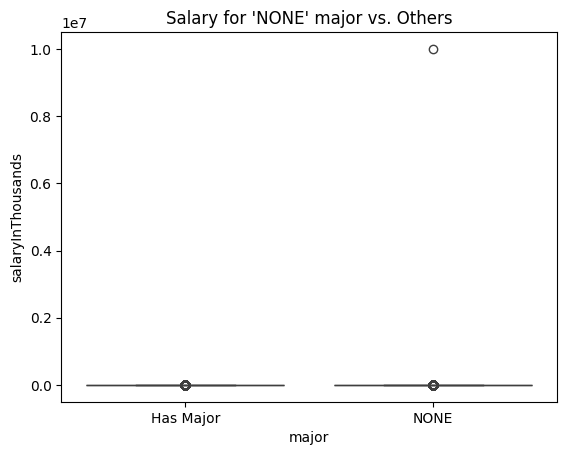

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=(master_dataset['major'] == 'NONE'), y='salaryInThousands', data=master_dataset)
plt.title("Salary for 'NONE' major vs. Others")
plt.xticks([0,1], ['Has Major', 'NONE'])
plt.show()


"NONE" is not a valid category, and having this might not lead us to proper EDA and modelling, therefore, we will treat "NONE" as missing value

In [49]:
import numpy as np
master_dataset['major'] = master_dataset['major'].replace('NONE', np.nan)
master_dataset['education'] = master_dataset['education'].replace('NONE', np.nan)


/var/folders/wv/lgt7rwvx5dn_v1y74zftwswh0000gn/T/ipykernel_26393/3592561304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dataset['major'] = master_dataset['major'].replace('NONE', np.nan)
/var/folders/wv/lgt7rwvx5dn_v1y74zftwswh0000gn/T/ipykernel_26393/3592561304.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_dataset['education'] = master_dataset['education'].replace('NONE', np.nan)


In [50]:
print("Missing Value after NaN imputation:\n",master_dataset.isnull().sum())

Missing Value after NaN imputation:
 jobId                     0
companyId                 0
jobRole                   0
education            236715
major                532061
industry                  0
yearsExperience           0
distanceFromCBD           0
salaryInThousands         0
dtype: int64


In [51]:
# --- 3. Drop rows where BOTH major AND education are missing ---
rows_before = master_dataset.shape[0]

master_dataset = master_dataset.dropna(subset=['major', 'education'], how='all')
rows_after_drop = master_dataset.shape[0]

print(f"Rows dropped where both 'major' and 'education' are missing: {rows_before - rows_after_drop}")
print("Rows remaining after drop:", rows_after_drop)

Rows dropped where both 'major' and 'education' are missing: 236715
Rows remaining after drop: 762759


In [52]:
# --- 4. Impute (fill) any remaining missing with 'Unknown' ---
master_dataset['major'] = master_dataset['major'].fillna('Unknown')
master_dataset['education'] = master_dataset['education'].fillna('Unknown')

In [53]:
# --- 5. Final check for missing values ---
print("\nMissing values after cleaning:")
print(master_dataset[['major', 'education']].isnull().sum())
print("Final number of rows:", master_dataset.shape[0])


Missing values after cleaning:
major        0
education    0
dtype: int64
Final number of rows: 762759


In [54]:
print("\nValue counts for 'major':")
print(master_dataset['major'].value_counts())
print("\nValue counts for 'education':")
print(master_dataset['education'].value_counts())


Value counts for 'major':
major
Unknown        295346
CHEMISTRY       58841
LITERATURE      58644
ENGINEERING     58568
BUSINESS        58498
PHYSICS         58381
COMPSCI         58352
BIOLOGY         58351
MATH            57778
Name: count, dtype: int64

Value counts for 'education':
education
HIGH_SCHOOL    236862
BACHELORS      175405
DOCTORAL       175271
MASTERS        175221
Name: count, dtype: int64


The above few codes have resolved the "NONE" issues!

### Standardisation

In [55]:
for columns in categorical_columns: 
    master_dataset[columns] = master_dataset[columns].str.strip().str.lower()

In [56]:
master_dataset

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands
0,JOB1362684407687,COMP37,cfo,masters,math,health,10.0,83.0,130.0
1,JOB1362684407688,COMP19,ceo,high_school,unknown,web,3.0,73.0,101.0
1786,JOB1362684407697,COMP56,janitor,high_school,unknown,health,24.0,30.0,102.0
1787,JOB1362684407698,COMP7,ceo,masters,physics,education,7.0,79.0,144.0
1789,JOB1362684407700,COMP54,junior,masters,math,finance,21.0,26.0,193.0
...,...,...,...,...,...,...,...,...,...
1023086,JOB1362685407682,COMP56,vice_president,bachelors,chemistry,health,19.0,94.0,88.0
1023087,JOB1362685407683,COMP24,cto,high_school,unknown,finance,12.0,35.0,160.0
1023088,JOB1362685407684,COMP23,junior,high_school,unknown,education,16.0,81.0,64.0
1023089,JOB1362685407685,COMP3,cfo,masters,unknown,health,6.0,5.0,149.0


### Outliers

In [57]:
numerical_columns = master_dataset.select_dtypes(include=[np.number]).columns.tolist()

outlier_summmary = {}

for column in numerical_columns:
    Q1 = master_dataset[column].quantile(0.25)
    Q3 = master_dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = master_dataset[(master_dataset[column] < lower_bound) | (master_dataset[column] > upper_bound)]
    number_of_outliers = outliers.shape[0]
    percentage = (number_of_outliers / master_dataset.shape[0]) * 100
    
    outlier_summmary[column] = {
        "number_of_outliers": number_of_outliers,
        "percentage": percentage,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound
    }
    print(f"\n{column}:")
    print(f"  Lower Bound: {lower_bound:.2f}")
    print(f"  Upper Bound: {upper_bound:.2f}")
    print(f"  # Outliers: {number_of_outliers} ({percentage:.2f}%)")
    print(f"  Min: {master_dataset[column].min()}, Max: {master_dataset[column].max()}")

    outlier_df = pd.DataFrame(outlier_summmary).T


yearsExperience:
  Lower Bound: -12.00
  Upper Bound: 36.00
  # Outliers: 0 (0.00%)
  Min: 0.0, Max: 24.0

distanceFromCBD:
  Lower Bound: -50.00
  Upper Bound: 150.00
  # Outliers: 2 (0.00%)
  Min: 0.0, Max: 500.0

salaryInThousands:
  Lower Bound: 18.50
  Upper Bound: 222.50
  # Outliers: 6105 (0.80%)
  Min: 0.0, Max: 10000000.0


#### `distanceFromCBD` outlier analysis

In [58]:
unique_distances = master_dataset["distanceFromCBD"].unique()
print("Unique distances from CBD:\n", unique_distances)

Unique distances from CBD:
 [ 83.  73.  30.  79.  26.   8.  91.  43.  66.  99.  69.  70.  40.   6.
  23.   9.   2.  32.  78.  14.  35.  17.  54.  93.  82.  87.  76.  22.
  44.  81.  72.  63.  25.   5.  71.  65.  13.  33.  55.  62.  75.  56.
  11.  12.  34.  52.  48.  97.  36.  16.  21.  28.  94.  41.  74.  60.
  80.  96.  29.  10.  50.   4.  59.  68.  95.  49.  15.   3.  51.  18.
  92.  42.  47.  84.  86.   0.  38. 400.  19.  20.  37.  64.  61.  98.
  46.   1.  27.  77.  39.  67.  88.  31.  45.  58.  57.  85.  89.  90.
   7.  24.  53. 500.]


In [59]:
print("Top 10 most common distances:")
print(master_dataset['distanceFromCBD'].value_counts().head(10))

print("\nLeast common distances (possible outliers):")
print(master_dataset['distanceFromCBD'].value_counts().tail(10))



Top 10 most common distances:
distanceFromCBD
62.0    7805
99.0    7794
92.0    7782
1.0     7769
41.0    7766
28.0    7762
93.0    7755
95.0    7755
58.0    7751
81.0    7748
Name: count, dtype: int64

Least common distances (possible outliers):
distanceFromCBD
15.0     7522
87.0     7517
8.0      7511
32.0     7501
24.0     7492
18.0     7467
73.0     7414
20.0     7408
400.0       1
500.0       1
Name: count, dtype: int64


In [60]:
# Define high distance threshold
high_distance_df = master_dataset[master_dataset['distanceFromCBD'] > 60]

print(f"Total rows with distanceFromCBD > 60: {high_distance_df.shape[0]}")


Total rows with distanceFromCBD > 60: 298068


In [61]:
print("\nIndustry breakdown for high distances:")
print(high_distance_df['industry'].value_counts())

print("\nCompany breakdown for high distances (top 10):")
print(high_distance_df['companyId'].value_counts().head(10))

print("\nJobRole breakdown for high distances:")
print(high_distance_df['jobRole'].value_counts())



Industry breakdown for high distances:
industry
health       42676
service      42659
finance      42627
auto         42610
education    42524
web          42506
oil          42466
Name: count, dtype: int64

Company breakdown for high distances (top 10):
companyId
COMP39    4853
COMP11    4825
COMP46    4824
COMP51    4813
COMP30    4809
COMP48    4807
COMP10    4797
COMP35    4797
COMP42    4792
COMP26    4791
Name: count, dtype: int64

JobRole breakdown for high distances:
jobRole
senior            39608
junior            39191
cto               39155
vice_president    39058
ceo               39041
cfo               38980
manager           38963
janitor           24072
Name: count, dtype: int64


In [62]:
print("\nSalary stats for high distances:")
print(high_distance_df['salaryInThousands'].describe())



Salary stats for high distances:
count    2.980680e+05
mean     1.430310e+02
std      1.831632e+04
min      1.800000e+01
25%      8.600000e+01
50%      1.080000e+02
75%      1.320000e+02
max      1.000000e+07
Name: salaryInThousands, dtype: float64


In [63]:
print("\nSalary stats for ALL employees:")
print(master_dataset['salaryInThousands'].describe())



Salary stats for ALL employees:
count    7.627590e+05
mean     1.347233e+02
std      1.144995e+04
min      0.000000e+00
25%      9.500000e+01
50%      1.190000e+02
75%      1.460000e+02
max      1.000000e+07
Name: salaryInThousands, dtype: float64


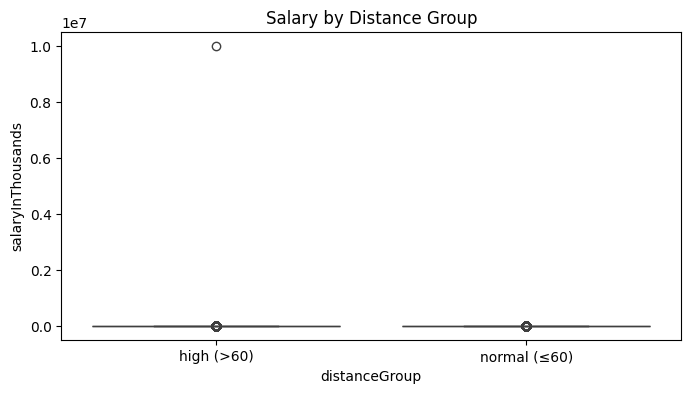

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

master_dataset['distanceGroup'] = master_dataset['distanceFromCBD'].apply(lambda x: 'high (>60)' if x > 60 else 'normal (≤60)')
plt.figure(figsize=(8,4))
sns.boxplot(x='distanceGroup', y='salaryInThousands', data=master_dataset)
plt.title("Salary by Distance Group")
plt.show()


In [65]:
master_dataset = master_dataset[master_dataset['distanceFromCBD'] <= 60]
print(f"Rows remaining after removing distance > 60: {master_dataset.shape[0]}")


Rows remaining after removing distance > 60: 464691


#### `salaryInThousands` Outlier Cleaning:

In [66]:
# Define bounds (from your IQR calculation)
lower_bound = 18.5
upper_bound = 222.5

# Filter for salary outliers
salary_outliers = master_dataset[(master_dataset['salaryInThousands'] < lower_bound) | 
                                (master_dataset['salaryInThousands'] > upper_bound)]

print("Number of salary outliers:", salary_outliers.shape[0])
print("\nSalary outlier stats:")
print(salary_outliers['salaryInThousands'].describe())

# See minimum and maximum
print("\nOutlier min:", salary_outliers['salaryInThousands'].min())
print("Outlier max:", salary_outliers['salaryInThousands'].max())


Number of salary outliers: 5868

Salary outlier stats:
count    5868.000000
mean      236.476994
std        13.862223
min         0.000000
25%       227.000000
50%       233.000000
75%       243.000000
max       301.000000
Name: salaryInThousands, dtype: float64

Outlier min: 0.0
Outlier max: 301.0


In [67]:
# Show the smallest and largest outlier salaries
print("Lowest salary outliers:")
print(salary_outliers.nsmallest(10, 'salaryInThousands')[['salaryInThousands', 'jobRole', 'industry']])

print("\nHighest salary outliers:")
print(salary_outliers.nlargest(10, 'salaryInThousands')[['salaryInThousands', 'jobRole', 'industry']])


Lowest salary outliers:
        salaryInThousands         jobRole industry
33214                 0.0          junior     auto
665824                0.0             cto     auto
829877                0.0         manager  finance
841904                0.0  vice_president      web
2921                223.0             ceo      oil
3017                223.0             cto   health
13258               223.0             ceo      web
14155               223.0             ceo      web
17632               223.0             cfo  finance
19407               223.0  vice_president  finance

Highest salary outliers:
        salaryInThousands jobRole industry
403266              301.0     cfo      oil
699310              301.0     cto      oil
586088              298.0     ceo      oil
295876              294.0     ceo      oil
925292              294.0     ceo  finance
517273              293.0     ceo      oil
919258              293.0     ceo  finance
49858               292.0     ceo  finance
89

In [68]:
# How many are exactly 0? How many are exactly 10,000,000?
print("Count of salary = 0:", (salary_outliers['salaryInThousands'] == 0).sum())
print("Count of salary = 10000000:", (salary_outliers['salaryInThousands'] == 10000000).sum())


Count of salary = 0: 4
Count of salary = 10000000: 0


In [69]:
print("\nTop job roles for salary outliers:")
print(salary_outliers['jobRole'].value_counts().head(10))

print("\nTop industries for salary outliers:")
print(salary_outliers['industry'].value_counts().head(10))



Top job roles for salary outliers:
jobRole
ceo               2640
cfo               1238
cto               1223
vice_president     511
manager            189
senior              50
junior              17
Name: count, dtype: int64

Top industries for salary outliers:
industry
oil          1960
finance      1775
web          1088
health        522
auto          277
service       161
education      85
Name: count, dtype: int64


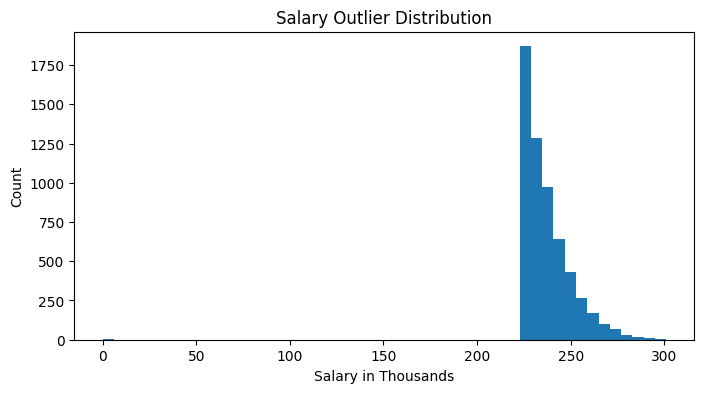

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.hist(salary_outliers['salaryInThousands'], bins=50)
plt.title("Salary Outlier Distribution")
plt.xlabel("Salary in Thousands")
plt.ylabel("Count")
plt.show()


In [71]:
master_dataset = master_dataset[
    (master_dataset['salaryInThousands'] >= 18.5) &
    (master_dataset['salaryInThousands'] <= 222.5)
]


In [72]:
master_dataset = master_dataset[master_dataset['salaryInThousands'] > 0]

Salary outliers (below $18.5k and above $222.5k) were removed based on the IQR rule. This ensures analysis and modeling are not affected by extreme or implausible values, particularly as Singapore’s salary ranges rarely reach the observed high outliers for standard industry roles.

In [73]:
master_dataset.shape

(458823, 10)

In [74]:
master_dataset

,jobId,companyId,jobRole,education,major,industry,yearsExperience,distanceFromCBD,salaryInThousands,distanceGroup
1786,JOB1362684407697,COMP56,janitor,high_school,unknown,health,24.0,30.0,102.0,normal (≤60)
1789,JOB1362684407700,COMP54,junior,masters,math,finance,21.0,26.0,193.0,normal (≤60)
1791,JOB1362684407702,COMP20,cto,masters,biology,service,13.0,8.0,172.0,normal (≤60)
1793,JOB1362684407704,COMP61,vice_president,masters,literature,service,23.0,43.0,126.0,normal (≤60)
1800,JOB1362684407711,COMP20,ceo,bachelors,unknown,web,12.0,8.0,202.0,normal (≤60)
...,...,...,...,...,...,...,...,...,...,...
1023083,JOB1362685407679,COMP30,manager,doctoral,physics,web,16.0,16.0,143.0,normal (≤60)
1023084,JOB1362685407680,COMP21,cfo,masters,chemistry,service,4.0,6.0,136.0,normal (≤60)
1023087,JOB1362685407683,COMP24,cto,high_school,unknown,finance,12.0,35.0,160.0,normal (≤60)
1023089,JOB1362685407685,COMP3,cfo,masters,unknown,health,6.0,5.0,149.0,normal (≤60)


### Check Dtypes | Missing | Duplicates

In [75]:
# check dtypes
print("\nData Types:")
print(master_dataset.dtypes)

print("\nMissing Values:")
print(master_dataset.isnull().sum())

print("\nDuplicates:")
print(master_dataset.duplicated().sum())


Data Types:
jobId                 object
companyId             object
jobRole               object
education             object
major                 object
industry              object
yearsExperience      float64
distanceFromCBD      float64
salaryInThousands    float64
distanceGroup         object
dtype: object

Missing Values:
jobId                0
companyId            0
jobRole              0
education            0
major                0
industry             0
yearsExperience      0
distanceFromCBD      0
salaryInThousands    0
distanceGroup        0
dtype: int64

Duplicates:
0


In [76]:
master_dataset.to_csv(os.path.join(cwd, 'master_dataset.csv'), index=False)

## EDA

### Q1 - What is the Highest Paying Job For Web Industry?

To deal with this question, we will: 

1. Extract all entires related to the web industry and store it in a separate df
2. Filter out to show the highest paying jobs for the web industry

In [86]:
master_dataset.columns

Index(['jobId', 'companyId', 'jobRole', 'education', 'major', 'industry',
       'yearsExperience', 'distanceFromCBD', 'salaryInThousands',
       'distanceGroup'],
      dtype='object')

Highest paying job in the Web industry: ceo ($222k)


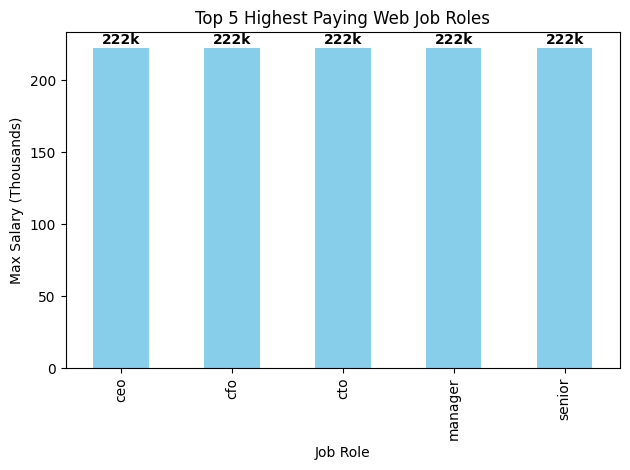

In [88]:
import matplotlib.pyplot as plt

# Filter web industry
web_industry_df = master_dataset[master_dataset['industry'].str.lower() == 'web']

# Find highest paying job
highest_web = web_industry_df.loc[web_industry_df['salaryInThousands'].idxmax()]
print(f"Highest paying job in the Web industry: {highest_web['jobRole']} (${int(highest_web['salaryInThousands'])}k)")

# Plot: Top 5 web jobs by salary
top_web_jobs = web_industry_df.groupby('jobRole')['salaryInThousands'].max().sort_values(ascending=False).head(5)

ax = top_web_jobs.plot(kind='bar', color='skyblue')
plt.title('Top 5 Highest Paying Web Job Roles')
plt.ylabel('Max Salary (Thousands)')
plt.xlabel('Job Role')

# Annotate bars with the salary numbers
for i, v in enumerate(top_web_jobs.values):
    plt.text(i, v + 1, f'{int(v)}k', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


### Q2 - Rank the top 10 job roles with the highest salary for all the industry

To solve this question, we will:

1. Group the merged df by the 10 highest paying jobs based on the "jobrole" and the "salaryinthousands" column and assign it to a variable
2. I will then plot out the entires in that variable

Top 10 highest paying job roles: jobRole
ceo               222.0
cfo               222.0
cto               222.0
junior            222.0
manager           222.0
senior            222.0
vice_president    222.0
janitor           189.0
Name: salaryInThousands, dtype: float64


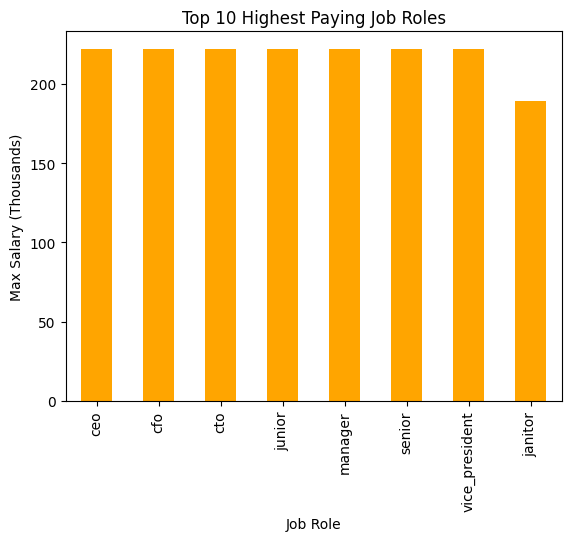

In [89]:
# Find top 10 job roles by max salary
top10_jobs = master_dataset.groupby('jobRole')['salaryInThousands'].max().sort_values(ascending=False).head(10)
print("Top 10 highest paying job roles:", top10_jobs)

# Plot
top10_jobs.plot(kind='bar', color='orange')
plt.title('Top 10 Highest Paying Job Roles')
plt.ylabel('Max Salary (Thousands)')
plt.xlabel('Job Role')
plt.show()


### Q3 - Which of the industries has the highest salary?

To combat this, we will:

1. Group the master dataset by the industry and the salaryinthousands column and assign it to a variable
2. Plot the entires into a histogram to compare

Industry with highest average salary: oil ($141.70k)


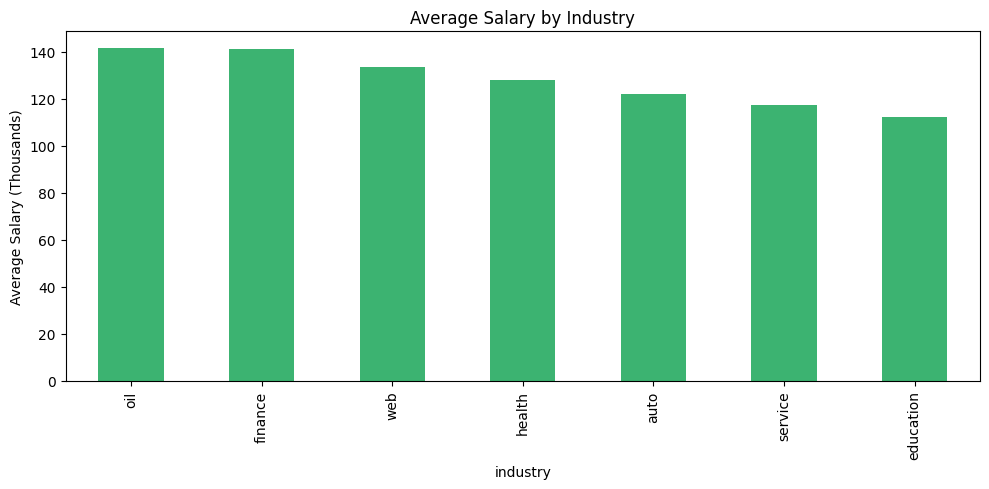

In [90]:
import matplotlib.pyplot as plt

# Highest average salary by industry
highest_industry = master_dataset.groupby('industry')['salaryInThousands'].mean().idxmax()
highest_salary = master_dataset.groupby('industry')['salaryInThousands'].mean().max()
print(f"Industry with highest average salary: {highest_industry} (${highest_salary:.2f}k)")

# Plot
industry_salary = master_dataset.groupby('industry')['salaryInThousands'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
industry_salary.plot(kind='bar', color='mediumseagreen')
plt.ylabel('Average Salary (Thousands)')
plt.title('Average Salary by Industry')
plt.tight_layout()
plt.show()


### Q4 - Which Job has the lowest pay?

In [93]:
lowest_job = master_dataset.groupby('jobRole')['salaryInThousands'].mean().idxmin()
lowest_salary = master_dataset.groupby('jobRole')['salaryInThousands'].mean().min()
print(f"Job role with lowest average salary: {lowest_job} (${lowest_salary:.2f}k)")


Job role with lowest average salary: janitor ($78.68k)


### Q5 - Which Industries has the lowest pay?

Industries with the lowest average salary:
industry
education    112.373995
service      117.425028
auto         122.095118
health       128.181599
web          133.592605
Name: salaryInThousands, dtype: float64


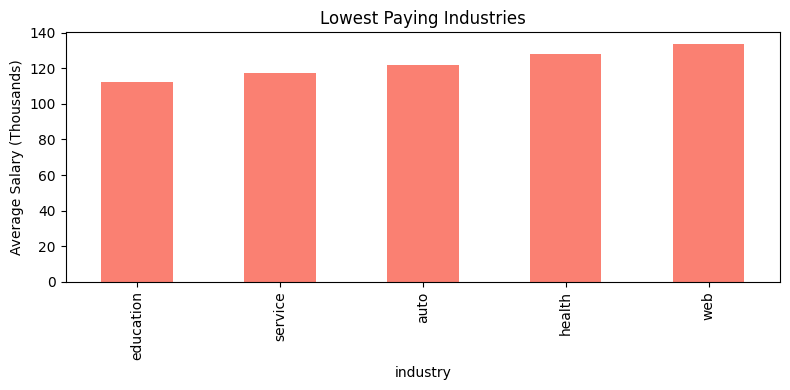

In [94]:
# Show bottom 5 industries by mean salary
lowest_industries = master_dataset.groupby('industry')['salaryInThousands'].mean().sort_values().head(5)
print("Industries with the lowest average salary:")
print(lowest_industries)

# Plot
plt.figure(figsize=(8,4))
lowest_industries.plot(kind='bar', color='salmon')
plt.ylabel('Average Salary (Thousands)')
plt.title('Lowest Paying Industries')
plt.tight_layout()
plt.show()


### Q5a - Median Salary

Q5a) Industry with highest % of people below $114k: education (52.86%)


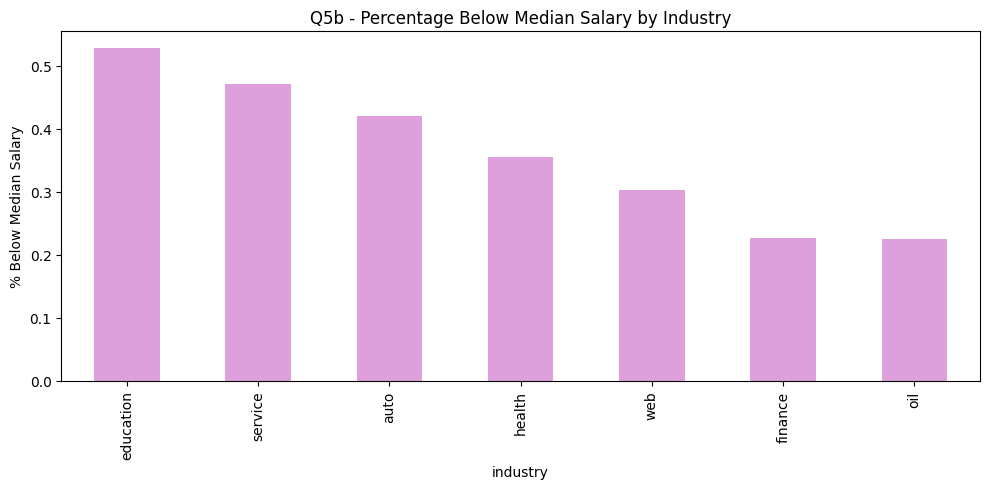

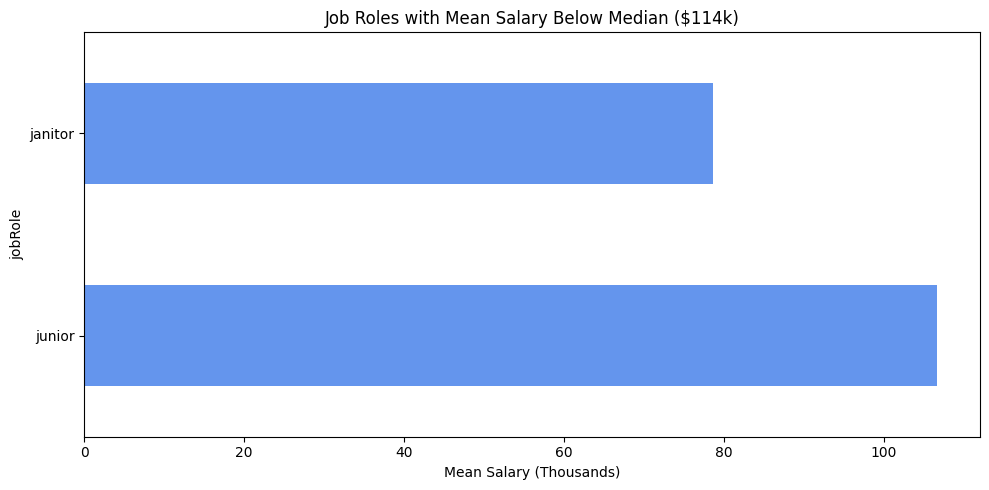



Job roles with mean salary below the median:
jobRole
janitor     78.682364
junior     106.708821
Name: salaryInThousands, dtype: float64


In [96]:
median_salary = 114

# 4a. Industry with the highest % below median salary
industry_counts = master_dataset.groupby('industry')['salaryInThousands'].apply(lambda x: (x < median_salary).mean())
industry_most_below = industry_counts.idxmax()
print(f"Q5a) Industry with highest % of people below ${median_salary}k: {industry_most_below} ({industry_counts[industry_most_below]*100:.2f}%)")

# Plot
industry_counts = industry_counts.sort_values(ascending=False)
plt.figure(figsize=(10,5))
industry_counts.plot(kind='bar', color='plum')
plt.ylabel('% Below Median Salary')
plt.title('Q5b - Percentage Below Median Salary by Industry')
plt.tight_layout()
plt.show()

# 4b. Job roles below median salary (by mean salary)
below_median_jobs = master_dataset.groupby('jobRole')['salaryInThousands'].mean()
below_median_jobs = below_median_jobs[below_median_jobs < median_salary]
plt.figure(figsize=(10,5))
below_median_jobs.sort_values(ascending=False).plot(kind='barh', color='cornflowerblue')
plt.xlabel('Mean Salary (Thousands)')
plt.title('Job Roles with Mean Salary Below Median ($114k)')
plt.tight_layout()
plt.show()
print("\n")
print("Job roles with mean salary below the median:")
print(below_median_jobs.sort_values())


### Q6 - Determine if there is a relationship between years of experience and salary

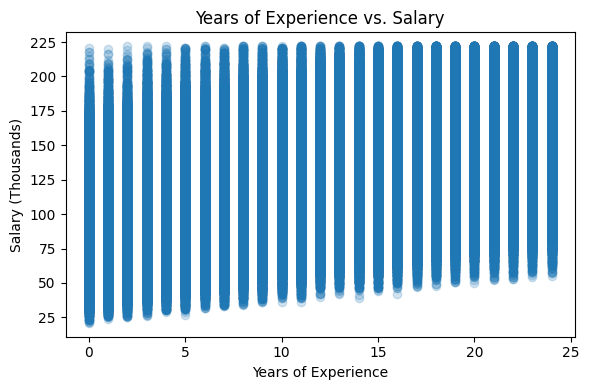

Correlation between years of experience and salary: 0.43


In [99]:
plt.figure(figsize=(6,4))
plt.scatter(master_dataset['yearsExperience'], master_dataset['salaryInThousands'], alpha=0.2)
plt.xlabel('Years of Experience')
plt.ylabel('Salary (Thousands)')
plt.title('Years of Experience vs. Salary')
plt.tight_layout()
plt.show()

# Correlation coefficient
corr_exp_salary = master_dataset[['yearsExperience','salaryInThousands']].corr().iloc[0,1]
print(f"Correlation between years of experience and salary: {corr_exp_salary:.2f}")


### Q7 - Determine if there is a relationship between education and Salary

<Figure size 1000x500 with 0 Axes>

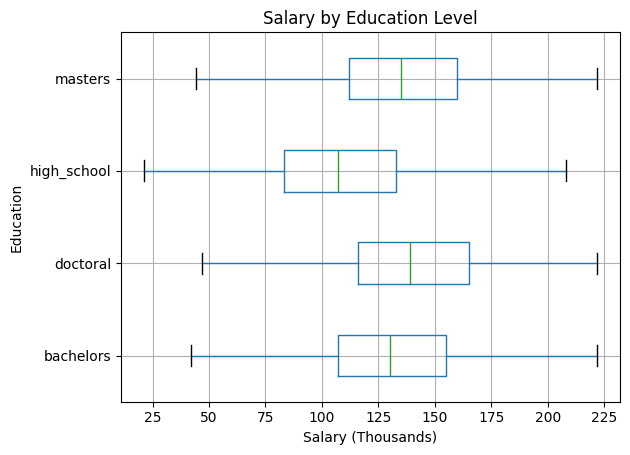

ANOVA F-test p-value for education vs. salary: 0.0000e+00


In [102]:
plt.figure(figsize=(10,5))
master_dataset.boxplot(column='salaryInThousands', by='education', vert=False, showfliers=False)
plt.title('Salary by Education Level')
plt.suptitle('')
plt.xlabel('Salary (Thousands)')
plt.ylabel('Education')
plt.tight_layout()
plt.show()

# ANOVA (if you want to test statistically)
import scipy.stats as stats
edu_groups = [group.dropna() for name, group in master_dataset.groupby('education')['salaryInThousands']]
anova_edu = stats.f_oneway(*edu_groups)
print(f"ANOVA F-test p-value for education vs. salary: {anova_edu.pvalue:.4e}")


### Does Major affect Salary?

<Figure size 1000x500 with 0 Axes>

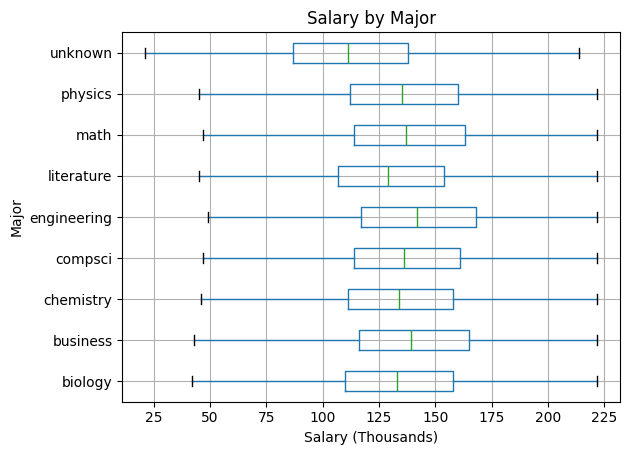

ANOVA F-test p-value for major vs. salary: 0.0000e+00


In [103]:
plt.figure(figsize=(10,5))
master_dataset.boxplot(column='salaryInThousands', by='major', vert=False, showfliers=False)
plt.title('Salary by Major')
plt.suptitle('')
plt.xlabel('Salary (Thousands)')
plt.ylabel('Major')
plt.tight_layout()
plt.show()

# ANOVA (if you want to test statistically)
major_groups = [group.dropna() for name, group in master_dataset.groupby('major')['salaryInThousands']]
anova_major = stats.f_oneway(*major_groups)
print(f"ANOVA F-test p-value for major vs. salary: {anova_major.pvalue:.4e}")


## ML Modelling

### X & Y Tensors

In [44]:
X = master_dataset.drop(['salaryInThousands', 'jobId', 'companyId'], axis=1)
y = master_dataset['salaryInThousands']

### Train-Test-Val Splitting

In [45]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)
# Split train vs val
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, random_state=42  # 0.1765 * 0.85 ≈ 0.15
)


In [46]:
print(f"Train shape: {X_train.shape}, Val shape: {X_val.shape}, Test shape: {X_test.shape}")

Train shape: (321164, 7), Val shape: (68835, 7), Test shape: (68824, 7)


### Categorical & Numerical

In [47]:
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()


In [48]:
print("Categorical columns:", cat_cols)
print("Numeric columns:", num_cols)

Categorical columns: ['jobRole', 'education', 'major', 'industry', 'distanceGroup']
Numeric columns: ['yearsExperience', 'distanceFromCBD']


### Data Pre-Processing

In [49]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

### Individual Model Training:

In [ ]:
# -- Prepare Data --
X = master_dataset.drop(['salaryInThousands', 'jobId', 'companyId'], axis=1)
y = master_dataset['salaryInThousands']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42)

cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

preprocessor = ColumnTransformer(
    transformers=[ 
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

In [74]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
def evaluate(model, X, y, label='Set'):
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{label}: RMSE={rmse:.2f}, MAE={mae:.2f}, R²={r2:.4f}")
    return rmse, mae, r2

#### RandomForest

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

rf_pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=60, n_jobs=-1, random_state=42))
])

print("\n--- Random Forest ---")
rf_pipe.fit(X_train, y_train)
evaluate(rf_pipe, X_train, y_train, 'Train')
evaluate(rf_pipe, X_val, y_val, 'Validation')
evaluate(rf_pipe, X_test, y_test, 'Test')



--- Random Forest ---
Train: RMSE=10.36, MAE=8.04, R²=0.9213
Validation: RMSE=22.20, MAE=18.01, R²=0.6371
Test: RMSE=22.14, MAE=17.92, R²=0.6400


(22.136154089078417, 17.9150171724937, 0.6400396517054615)

#### DecisionTree

In [76]:
from sklearn.tree import DecisionTreeRegressor

dt_pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('dt', DecisionTreeRegressor(random_state=42, max_depth=10))
])

print("\n--- Decision Tree ---")
dt_pipe.fit(X_train, y_train)
evaluate(dt_pipe, X_train, y_train, 'Train')
evaluate(dt_pipe, X_val, y_val, 'Validation')
evaluate(dt_pipe, X_test, y_test, 'Test')



--- Decision Tree ---
Train: RMSE=22.36, MAE=18.04, R²=0.6332
Validation: RMSE=22.45, MAE=18.17, R²=0.6287
Test: RMSE=22.50, MAE=18.16, R²=0.6282


(22.4970339781793, 18.15795295339086, 0.6282073042468278)

#### LightGBM

In [77]:
from lightgbm import LGBMRegressor

lgbm_pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('lgbm', LGBMRegressor(n_estimators=60, n_jobs=-1, random_state=42, verbose=-1))
])

print("\n--- LightGBM ---")
lgbm_pipe.fit(X_train, y_train)
evaluate(lgbm_pipe, X_train, y_train, 'Train')
evaluate(lgbm_pipe, X_val, y_val, 'Validation')
evaluate(lgbm_pipe, X_test, y_test, 'Test')



--- LightGBM ---


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Train: RMSE=20.10, MAE=16.62, R²=0.7035
Validation: RMSE=20.17, MAE=16.67, R²=0.7003
Test: RMSE=20.14, MAE=16.64, R²=0.7021


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


(20.138980088258272, 16.641220901984397, 0.702062430981378)

##### RandomSearch

In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

from lightgbm import LGBMRegressor

# -- Preprocessing Pipeline --
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

# -- Full Modeling Pipeline: Preprocessing + Feature Selection + LGBM --
# -- LGBM Model with more trees --
pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('lgbm', LGBMRegressor(n_estimators=100, n_jobs=-1, random_state=42, verbose=-1))
])

param_dist = {
    'lgbm__max_depth': [5, 7, 10, 15, -1],
    'lgbm__learning_rate': [0.01, 0.05, 0.1],
    'lgbm__num_leaves': [15, 31, 63, 127],
    'lgbm__reg_alpha': [0, 0.1, 0.5],
    'lgbm__reg_lambda': [0, 0.1, 0.5],
    'lgbm__colsample_bytree': [0.7, 0.8, 1.0],
}

random_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=12,     # Up to 20 for even better tuning if time allows
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='neg_root_mean_squared_error'
)


# -- Fit (should complete in under 5 mins) --
import time
start = time.time()
print("Quick LGBM pipeline + hyperparameter search...")
random_search.fit(X_train, y_train)
print(f"Fit time: {time.time() - start:.1f} seconds")
print("Best params:", random_search.best_params_)

# -- Evaluate --
def evaluate(model, X, y, label='Set'):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{label}: RMSE={rmse:.2f}, MAE={mae:.2f}, R²={r2:.4f}")
    return rmse, mae, r2

print("\nPerformance:")
evaluate(random_search, X_train, y_train, label='Train')
evaluate(random_search, X_val, y_val, label='Validation')
evaluate(random_search, X_test, y_test, label='Test')


Quick LGBM pipeline + hyperparameter search...
Fitting 3 folds for each of 12 candidates, totalling 36 fits


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END lgbm__colsample_bytree=0.8, lgbm__learning_rate=0.1, lgbm__max_depth=7, lgbm__num_leaves=63, lgbm__reg_alpha=0, lgbm__reg_lambda=0.5; total time=   2.8s


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END lgbm__colsample_bytree=0.8, lgbm__learning_rate=0.1, lgbm__max_depth=7, lgbm__num_leaves=63, lgbm__reg_alpha=0, lgbm__reg_lambda=0.5; total time=   3.1s
[CV] END lgbm__colsample_bytree=0.8, lgbm__learning_rate=0.1, lgbm__max_depth=7, lgbm__num_leaves=63, lgbm__reg_alpha=0, lgbm__reg_lambda=0.5; total time=   3.2s


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END lgbm__colsample_bytree=1.0, lgbm__learning_rate=0.05, lgbm__max_depth=10, lgbm__num_leaves=15, lgbm__reg_alpha=0, lgbm__reg_lambda=0.5; total time=   2.7s
[CV] END lgbm__colsample_bytree=1.0, lgbm__learning_rate=0.05, lgbm__max_depth=10, lgbm__num_leaves=15, lgbm__reg_alpha=0, lgbm__reg_lambda=0.5; total time=   2.0s


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END lgbm__colsample_bytree=1.0, lgbm__learning_rate=0.05, lgbm__max_depth=10, lgbm__num_leaves=15, lgbm__reg_alpha=0, lgbm__reg_lambda=0.5; total time=   2.2s


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END lgbm__colsample_bytree=0.8, lgbm__learning_rate=0.1, lgbm__max_depth=-1, lgbm__num_leaves=127, lgbm__reg_alpha=0.5, lgbm__reg_lambda=0; total time=   7.2s
[CV] END lgbm__colsample_bytree=0.8, lgbm__learning_rate=0.1, lgbm__max_depth=-1, lgbm__num_leaves=127, lgbm__reg_alpha=0.5, lgbm__reg_lambda=0; total time=   7.4s
[CV] END lgbm__colsample_bytree=0.8, lgbm__learning_rate=0.1, lgbm__max_depth=-1, lgbm__num_leaves=127, lgbm__reg_alpha=0.5, lgbm__reg_lambda=0; total time=   7.5s


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END lgbm__colsample_bytree=1.0, lgbm__learning_rate=0.01, lgbm__max_depth=15, lgbm__num_leaves=31, lgbm__reg_alpha=0.1, lgbm__reg_lambda=0.5; total time=   3.3s
[CV] END lgbm__colsample_bytree=1.0, lgbm__learning_rate=0.01, lgbm__max_depth=15, lgbm__num_leaves=31, lgbm__reg_alpha=0.1, lgbm__reg_lambda=0.5; total time=   3.4s


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END lgbm__colsample_bytree=1.0, lgbm__learning_rate=0.01, lgbm__max_depth=15, lgbm__num_leaves=31, lgbm__reg_alpha=0.1, lgbm__reg_lambda=0.5; total time=   3.4s
[CV] END lgbm__colsample_bytree=0.8, lgbm__learning_rate=0.01, lgbm__max_depth=5, lgbm__num_leaves=31, lgbm__reg_alpha=0.1, lgbm__reg_lambda=0.5; total time=   2.8s
[CV] END lgbm__colsample_bytree=0.8, lgbm__learning_rate=0.01, lgbm__max_depth=15, lgbm__num_leaves=127, lgbm__reg_alpha=0, lgbm__reg_lambda=0; total time=   8.2s
[CV] END lgbm__colsample_bytree=0.8, lgbm__learning_rate=0.01, lgbm__max_depth=15, lgbm__num_leaves=127, lgbm__reg_alpha=0, lgbm__reg_lambda=0; total time=   7.7s


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does 

[CV] END lgbm__colsample_bytree=0.8, lgbm__learning_rate=0.01, lgbm__max_depth=5, lgbm__num_leaves=31, lgbm__reg_alpha=0.1, lgbm__reg_lambda=0.5; total time=   2.6s
[CV] END lgbm__colsample_bytree=0.8, lgbm__learning_rate=0.01, lgbm__max_depth=15, lgbm__num_leaves=127, lgbm__reg_alpha=0, lgbm__reg_lambda=0; total time=   7.8s


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END lgbm__colsample_bytree=0.8, lgbm__learning_rate=0.01, lgbm__max_depth=5, lgbm__num_leaves=31, lgbm__reg_alpha=0.1, lgbm__reg_lambda=0.5; total time=   2.5s
[CV] END lgbm__colsample_bytree=0.8, lgbm__learning_rate=0.1, lgbm__max_depth=10, lgbm__num_leaves=15, lgbm__reg_alpha=0.1, lgbm__reg_lambda=0.5; total time=   1.8s


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END lgbm__colsample_bytree=0.8, lgbm__learning_rate=0.1, lgbm__max_depth=10, lgbm__num_leaves=15, lgbm__reg_alpha=0.1, lgbm__reg_lambda=0.5; total time=   1.9s
[CV] END lgbm__colsample_bytree=0.8, lgbm__learning_rate=0.1, lgbm__max_depth=10, lgbm__num_leaves=15, lgbm__reg_alpha=0.1, lgbm__reg_lambda=0.5; total time=   1.7s


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END lgbm__colsample_bytree=0.7, lgbm__learning_rate=0.05, lgbm__max_depth=5, lgbm__num_leaves=127, lgbm__reg_alpha=0.5, lgbm__reg_lambda=0.1; total time=   1.7s


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END lgbm__colsample_bytree=0.7, lgbm__learning_rate=0.05, lgbm__max_depth=5, lgbm__num_leaves=127, lgbm__reg_alpha=0.5, lgbm__reg_lambda=0.1; total time=   1.8s
[CV] END lgbm__colsample_bytree=0.7, lgbm__learning_rate=0.05, lgbm__max_depth=5, lgbm__num_leaves=127, lgbm__reg_alpha=0.5, lgbm__reg_lambda=0.1; total time=   1.8s


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END lgbm__colsample_bytree=1.0, lgbm__learning_rate=0.1, lgbm__max_depth=-1, lgbm__num_leaves=31, lgbm__reg_alpha=0.1, lgbm__reg_lambda=0; total time=   2.7s


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END lgbm__colsample_bytree=1.0, lgbm__learning_rate=0.1, lgbm__max_depth=-1, lgbm__num_leaves=31, lgbm__reg_alpha=0.1, lgbm__reg_lambda=0; total time=   3.1s
[CV] END lgbm__colsample_bytree=1.0, lgbm__learning_rate=0.1, lgbm__max_depth=-1, lgbm__num_leaves=31, lgbm__reg_alpha=0.1, lgbm__reg_lambda=0; total time=   3.1s


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END lgbm__colsample_bytree=1.0, lgbm__learning_rate=0.05, lgbm__max_depth=-1, lgbm__num_leaves=15, lgbm__reg_alpha=0.5, lgbm__reg_lambda=0; total time=   2.3s
[CV] END lgbm__colsample_bytree=1.0, lgbm__learning_rate=0.1, lgbm__max_depth=10, lgbm__num_leaves=127, lgbm__reg_alpha=0, lgbm__reg_lambda=0; total time=   6.3s
[CV] END lgbm__colsample_bytree=1.0, lgbm__learning_rate=0.05, lgbm__max_depth=-1, lgbm__num_leaves=15, lgbm__reg_alpha=0.5, lgbm__reg_lambda=0; total time=   2.3s


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END lgbm__colsample_bytree=1.0, lgbm__learning_rate=0.1, lgbm__max_depth=10, lgbm__num_leaves=127, lgbm__reg_alpha=0, lgbm__reg_lambda=0; total time=   6.7s
[CV] END lgbm__colsample_bytree=1.0, lgbm__learning_rate=0.1, lgbm__max_depth=10, lgbm__num_leaves=127, lgbm__reg_alpha=0, lgbm__reg_lambda=0; total time=   6.4s
[CV] END lgbm__colsample_bytree=1.0, lgbm__learning_rate=0.05, lgbm__max_depth=-1, lgbm__num_leaves=15, lgbm__reg_alpha=0.5, lgbm__reg_lambda=0; total time=   2.0s


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END lgbm__colsample_bytree=0.7, lgbm__learning_rate=0.01, lgbm__max_depth=-1, lgbm__num_leaves=31, lgbm__reg_alpha=0.5, lgbm__reg_lambda=0; total time=   2.6s


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END lgbm__colsample_bytree=0.7, lgbm__learning_rate=0.01, lgbm__max_depth=-1, lgbm__num_leaves=31, lgbm__reg_alpha=0.5, lgbm__reg_lambda=0; total time=   2.0s


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[CV] END lgbm__colsample_bytree=0.7, lgbm__learning_rate=0.01, lgbm__max_depth=-1, lgbm__num_leaves=31, lgbm__reg_alpha=0.5, lgbm__reg_lambda=0; total time=   1.6s
Fit time: 27.5 seconds
Best params: {'lgbm__reg_lambda': 0, 'lgbm__reg_alpha': 0.1, 'lgbm__num_leaves': 31, 'lgbm__max_depth': -1, 'lgbm__learning_rate': 0.1, 'lgbm__colsample_bytree': 1.0}

Performance:


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Train: RMSE=19.99, MAE=16.53, R²=0.7070
Validation: RMSE=20.09, MAE=16.62, R²=0.7028


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Test: RMSE=20.05, MAE=16.58, R²=0.7047


(20.0506150717309, 16.580960573417517, 0.7046712522073441)

#### XGBoost

In [78]:
from xgboost import XGBRegressor

xgb_pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('xgb', XGBRegressor(n_estimators=60, n_jobs=-1, random_state=42, verbosity=0))
])

print("\n--- XGBoost ---")
xgb_pipe.fit(X_train, y_train)
evaluate(xgb_pipe, X_train, y_train, 'Train')
evaluate(xgb_pipe, X_val, y_val, 'Validation')
evaluate(xgb_pipe, X_test, y_test, 'Test')



--- XGBoost ---
Train: RMSE=19.90, MAE=16.44, R²=0.7095
Validation: RMSE=20.15, MAE=16.65, R²=0.7008
Test: RMSE=20.13, MAE=16.62, R²=0.7023


(20.131489796930165, 16.622632362919326, 0.702284013620911)

### Stacked Model Development Round 1

In [50]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor

In [ ]:
# # base_estimators = [
# #     ('ridge', Ridge()),
# #     ('dt', DecisionTreeRegressor(random_state=42)),
# #     ('rf', RandomForestRegressor(random_state=42)),
# #     ('xgb', XGBRegressor(random_state=42, verbosity=0)),
# #     ('lgbm', LGBMRegressor(random_state=42, verbose=-1)),
# #     ('knn', KNeighborsRegressor(n_neighbors=7)),
# #     ('svr', SVR()),
# #     ('extra', ExtraTreesRegressor(random_state=42)),
# #     ('mlp', MLPRegressor(random_state=42, max_iter=200))
# # ]
# # removed earlier cuz took too long to run

base_estimators = [
    ('ridge', Ridge()),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=30, n_jobs=-1, random_state=42, verbosity=0)),
    ('lgbm', LGBMRegressor(n_estimators=30, n_jobs=-1, random_state=42, verbose=-1)),
    ('extra', ExtraTreesRegressor(n_estimators=30, n_jobs=-1, random_state=42))
    # KNN, SVR, and MLP omitted for speed
]


In [54]:
ensemble = StackingRegressor(
    estimators=base_estimators,
    final_estimator=Ridge(),
    passthrough=True,
    n_jobs=-1
)


In [55]:
full_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('ensemble', ensemble)
])


In [56]:
import time
start = time.time()
print("Fitting fast ensemble model...")
full_pipeline.fit(X_train, y_train)
print(f"Fit time: {time.time() - start:.1f} seconds")

Fitting fast ensemble model...


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does 

Fit time: 71.6 seconds


#### Stacked Model Evaluation

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate(model, X, y, label='Set'):
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{label}: RMSE={rmse:.2f}, MAE={mae:.2f}, R²={r2:.4f}")
    return rmse, mae, r2


In [58]:
print("\nPerformance:")
evaluate(full_pipeline, X_train, y_train, label='Train')
evaluate(full_pipeline, X_val, y_val, label='Validation')
evaluate(full_pipeline, X_test, y_test, label='Test')


Performance:


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Train: RMSE=19.53, MAE=16.14, R²=0.7202


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Validation: RMSE=20.17, MAE=16.66, R²=0.7003


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Test: RMSE=20.14, MAE=16.63, R²=0.7020


(20.141272395105425, 16.628445734796166, 0.7019946020053834)

In [59]:
# --- 10. (Optional) Feature Importance (from Random Forest/XGBoost) ---
importances = full_pipeline.named_steps['ensemble'].estimators_[2].feature_importances_
# Get feature names after preprocessing
ohe = full_pipeline.named_steps['preprocessing'].named_transformers_['cat']
feature_names = num_cols + list(ohe.get_feature_names_out(cat_cols))
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
print("\nTop 10 Features by RandomForest:")
print(feature_importance_df.sort_values('importance', ascending=False).head(10))


Top 10 Features by RandomForest:
                  feature  importance
0         yearsExperience    0.248906
5         jobRole_janitor    0.167401
1         distanceFromCBD    0.160903
6          jobRole_junior    0.077964
8          jobRole_senior    0.048018
24     industry_education    0.029788
7         jobRole_manager    0.028018
12  education_high_school    0.023469
28       industry_service    0.021723
22          major_unknown    0.019742


### Stacking Model Round 2:

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
# from catboost import CatBoostRegressor  # Uncomment if CatBoost is installed

# -- Preprocessing: Polynomial only for numerics --
preprocessor = ColumnTransformer([
    ('poly_num', Pipeline([
        ('scale', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False))
    ]), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
])

# -- Define essential regressors --
estimators = [
    ('rf', RandomForestRegressor(n_estimators=60, max_depth=10, n_jobs=-1, random_state=42)),
    ('lgbm', LGBMRegressor(n_estimators=60, max_depth=10, n_jobs=-1, random_state=42, verbose=-1)),
    ('xgb', XGBRegressor(n_estimators=60, max_depth=10, n_jobs=-1, random_state=42, verbosity=0)),
    # ('cat', CatBoostRegressor(iterations=60, depth=6, random_state=42, verbose=0))  # Optional: Uncomment if you want to try CatBoost
]

# -- Stacking Ensemble with Ridge meta-model --
ensemble = StackingRegressor(
    estimators=estimators,
    final_estimator=LGBMRegressor(n_estimators=30, max_depth=5, random_state=42, verbose=-1),
    passthrough=True,
    n_jobs=-1
)

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('ensemble', ensemble)
])

# -- Train --
import time
start = time.time()
print("Fitting stacking ensemble (RF, LGBM, XGB)...")
pipeline.fit(X_train, y_train)
print(f"Fit time: {time.time() - start:.1f} seconds")

# -- Evaluate --
def evaluate(model, X, y, label='Set'):
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{label}: RMSE={rmse:.2f}, MAE={mae:.2f}, R²={r2:.4f}")
    return rmse, mae, r2

print("\nPerformance:")
evaluate(pipeline, X_train, y_train, label='Train')
evaluate(pipeline, X_val, y_val, label='Validation')
evaluate(pipeline, X_test, y_test, label='Test')


Fitting stacking ensemble (RF, LGBM, XGB)...


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does 

Fit time: 60.9 seconds

Performance:


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Train: RMSE=19.74, MAE=16.32, R²=0.7142
Validation: RMSE=20.17, MAE=16.68, R²=0.7004


/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/saikeerthan/NYP-AI/Year3/new_y3s1/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Test: RMSE=20.14, MAE=16.64, R²=0.7021


(20.13863066573739, 16.641523921638797, 0.7020727696572022)

## PySpark

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, trim, lower, count, mean, stddev, min, max

In [2]:
import os
os.environ['JAVA_HOME'] = '/Library/Java/JavaVirtualMachines/openjdk-11.jdk/Contents/Home'
os.environ['PATH'] = f"/Library/Java/JavaVirtualMachines/openjdk-11.jdk/Contents/Home/bin:{os.environ['PATH']}"

### Instantiate the Spark Connection

In [3]:
spark = SparkSession.builder \
    .appName("BigDataAssignment-232594T") \
    .getOrCreate()

print("Spark session started....")

25/08/03 00:31:14 WARN Utils: Your hostname, Sais-Macbook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.0.14 instead (on interface en0)
25/08/03 00:31:14 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/08/03 00:31:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Spark session started....


### PySpark Data Cleaning

In [6]:
ps_employee_df = spark.read.csv(os.path.join(cwd, 'Employee_dataset.csv'), header=True, inferSchema=True)
ps_employee_salary = spark.read.csv(os.path.join(cwd, 'Employee_salaries.csv'), header=True, inferSchema=True)

In [8]:
# merge both the datasets on "jobId" column
ps_master_dataset = ps_employee_df.join(ps_employee_salary, on='jobId', how='inner')

#### PySpark Data Cleaning: Handle Missing Values & Duplicate Values

In [9]:
"""
remove both the missing values and duplicates
"""

# remove missing 
ps_master_dataset = ps_master_dataset.dropna(how='any')
# remove duplicates
ps_master_dataset = ps_master_dataset.dropDuplicates()

### PySpark Data Cleaning: Handling "NONE" Values

In [10]:
none_columns = ['major', 'education'] # define the columns to replace 'NONE' with null
for column in none_columns:
    ps_master_dataset = ps_master_dataset.withColumn(column, when(col(column) == 'NONE', None).otherwise(col(column)))

In [11]:
ps_master_dataset = ps_master_dataset.dropna(how='all', subset=['major', 'education'])
ps_master_dataset = ps_master_dataset.fillna('Unknown', subset=['major', 'education'])

#### PySpark Data Cleaning: Standardise Columns

In [13]:
categorical_columns = ["jobRole", "education", "major", "industry"]

# Apply lower and trim functions
for column in categorical_columns:
    ps_master_dataset = ps_master_dataset.withColumn(column, lower(trim(col(column))))

#### PySpark Data Cleaning: Filter Outliers

In [14]:
# Filter outliers based on your criteria
ps_master_dataset = ps_master_dataset.filter(
    (col("distanceFromCBD") <= 60) &
    (col("salaryInThousands").between(18.5, 222.5)) &
    (col("salaryInThousands") > 0)
)

#### PySpark Data Cleaning: View The Schema and the current Dataset

In [15]:
print("Schema after cleaning:")
ps_master_dataset.printSchema()

print("\\nSample of the cleaned data:")
ps_master_dataset.show(10)

Schema after cleaning:
root
 |-- jobId: string (nullable = true)
 |-- companyId: string (nullable = true)
 |-- jobRole: string (nullable = true)
 |-- education: string (nullable = false)
 |-- major: string (nullable = false)
 |-- industry: string (nullable = true)
 |-- yearsExperience: integer (nullable = true)
 |-- distanceFromCBD: integer (nullable = true)
 |-- salaryInThousands: integer (nullable = true)

\nSample of the cleaned data:


+----------------+---------+--------------+-----------+----------+--------+---------------+---------------+-----------------+
|           jobId|companyId|       jobRole|  education|     major|industry|yearsExperience|distanceFromCBD|salaryInThousands|
+----------------+---------+--------------+-----------+----------+--------+---------------+---------------+-----------------+
|JOB1362684407724|    COMP8|vice_president|   doctoral|  business|  health|             24|             35|              183|
|JOB1362684407746|   COMP11|vice_president|    masters|literature| service|             10|              5|              106|
|JOB1362684407774|   COMP44|        junior|   doctoral| chemistry|     web|             19|             35|              162|
|JOB1362684407797|   COMP51|       manager|   doctoral|   compsci| service|             22|              9|              207|
|JOB1362684407814|   COMP24|           ceo|   doctoral|literature|     web|              6|             30|           

In [16]:
# To check the row count after cleaning
print(f"\\nTotal rows after cleaning: {ps_master_dataset.count()}")

\nTotal rows after cleaning: 458823


Sanity Check 

In [17]:
from pyspark.sql.functions import col, count, when

# Count nulls in each column of your cleaned DataFrame
ps_master_dataset.select(
    [count(when(col(c).isNull(), c)).alias(c) for c in ps_master_dataset.columns]
).show()

+-----+---------+-------+---------+-----+--------+---------------+---------------+-----------------+
|jobId|companyId|jobRole|education|major|industry|yearsExperience|distanceFromCBD|salaryInThousands|
+-----+---------+-------+---------+-----+--------+---------------+---------------+-----------------+
|    0|        0|      0|        0|    0|       0|              0|              0|                0|
+-----+---------+-------+---------+-----+--------+---------------+---------------+-----------------+



### PySpark: Model Training Round 1:

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml import Pipeline
from pyspark.ml.feature import (
    StringIndexer,
    OneHotEncoder,
    VectorAssembler,
    StandardScaler,
)
from pyspark.ml.regression import (
    LinearRegression,
    RandomForestRegressor,
    GBTRegressor,
)
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator

In [2]:
spark = SparkSession.builder.appName("SalaryPrediction").getOrCreate()

25/08/03 01:35:15 WARN Utils: Your hostname, Sais-Macbook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.0.14 instead (on interface en0)
25/08/03 01:35:15 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/08/03 01:35:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
df = spark.read.csv(
    "master_dataset.csv", header=True, inferSchema=True
)

#### PySpark Model Training Round 1: Data Pre-Processing

In [4]:
# Define your feature columns
categorical_cols = ["jobRole", "education", "major", "industry"]
numerical_cols = ["yearsExperience", "distanceFromCBD"]

# This list will hold all the individual pipeline stages
stages = []


In [5]:
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import (
    StringIndexer,
    VectorAssembler,
    StandardScaler,
)
for c in categorical_cols:
    string_indexer = StringIndexer(inputCol=c, outputCol=f"{c}_idx")
    
    # ***FIX 2: Use the modern syntax for OneHotEncoder***
    # The input/output columns are passed directly to the constructor.
    onehot_encoder = OneHotEncoder(inputCol=f"{c}_idx", outputCol=f"{c}_ohe")
    
    stages += [string_indexer, onehot_encoder]


# Stage 3: Assemble numerical features into a single vector
numerical_assembler = VectorAssembler(
    inputCols=numerical_cols, outputCol="numerical_features"
)
scaler = StandardScaler(
    inputCol="numerical_features", 
    outputCol="scaled_numerical_features"
)

stages += [numerical_assembler,scaler]

In [6]:
# Stage 5: Assemble all processed features into a final vector for the model
feature_cols = [f"{c}_ohe" for c in categorical_cols] + [
    "scaled_numerical_features"
]
final_assembler = VectorAssembler(
    inputCols=feature_cols, outputCol="features"
)
stages += [final_assembler]

In [7]:
# feature_pipeline = Pipeline(stages=stages)

# # Fit the pipeline to the data to learn transformations and then transform the data
# prepped_df = feature_pipeline.fit(df).transform(df)

# # Split data into training (60%), validation (20%), and testing (20%) sets
# train_df, val_df, test_df = prepped_df.randomSplit([0.6, 0.2, 0.2], seed=42)

feature_pipeline = Pipeline(stages=stages)
prepped_df = feature_pipeline.fit(df).transform(df)
train_df, val_df, test_df = prepped_df.randomSplit([0.6, 0.2, 0.2], seed=42)

In [8]:
print("Preprocessing complete. Schema of the final DataFrame:")
train_df.printSchema()

print("\\nSample of the training data:")
train_df.select("features", "salaryInThousands").show(5, truncate=False)

print(f"Training Data Count: {train_df.count()}")
print(f"Validation Data Count: {val_df.count()}")
print(f"Test Data Count: {test_df.count()}")

Preprocessing complete. Schema of the final DataFrame:
root
 |-- jobId: string (nullable = true)
 |-- companyId: string (nullable = true)
 |-- jobRole: string (nullable = true)
 |-- education: string (nullable = true)
 |-- major: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- yearsExperience: double (nullable = true)
 |-- distanceFromCBD: double (nullable = true)
 |-- salaryInThousands: double (nullable = true)
 |-- distanceGroup: string (nullable = true)
 |-- jobRole_idx: double (nullable = false)
 |-- jobRole_ohe: vector (nullable = true)
 |-- education_idx: double (nullable = false)
 |-- education_ohe: vector (nullable = true)
 |-- major_idx: double (nullable = false)
 |-- major_ohe: vector (nullable = true)
 |-- industry_idx: double (nullable = false)
 |-- industry_ohe: vector (nullable = true)
 |-- numerical_features: vector (nullable = true)
 |-- scaled_numerical_features: vector (nullable = true)
 |-- features: vector (nullable = true)

\nSample of the tra

+------------------------------------------------------------------------------+-----------------+
|features                                                                      |salaryInThousands|
+------------------------------------------------------------------------------+-----------------+
|(26,[3,9,17,24,25],[1.0,1.0,1.0,2.9249692634886015,1.4764449196256981])       |193.0            |
|(26,[2,9,11,22,24,25],[1.0,1.0,1.0,1.0,3.2035377647732304,2.4418127516886545])|126.0            |
|(26,[6,8,15,19,24,25],[1.0,1.0,1.0,1.0,3.342822015415545,2.271453722501074])  |158.0            |
|(26,[7,10,24,25],[1.0,1.0,2.7856850128462876,1.3060858904381174])             |101.0            |
|(26,[5,8,14,20,24,25],[1.0,1.0,1.0,1.0,2.5071165115616587,1.8171629780008591])|132.0            |
+------------------------------------------------------------------------------+-----------------+
only showing top 5 rows



Training Data Count: 275859


Validation Data Count: 91257


Test Data Count: 91707


#### PySpark Fine Tuning Round 1: Model Training & Evaluation

In [9]:
evaluator = RegressionEvaluator(
    labelCol="salaryInThousands", predictionCol="prediction", metricName="rmse"
)

Define a hell of a lot of Models

In [10]:
lr = LinearRegression(featuresCol="features", labelCol="salaryInThousands")
lr_param_grid = (
    ParamGridBuilder()
    .addGrid(lr.regParam, [0.01, 0.1])
    .addGrid(lr.elasticNetParam, [0.0, 1.0])
    .build()
)

# --- Model 2: Random Forest Regressor ---
rf = RandomForestRegressor(featuresCol="features", labelCol="salaryInThousands", seed=42)
rf_param_grid = (
    ParamGridBuilder()
    .addGrid(rf.numTrees, [20, 50])
    .addGrid(rf.maxDepth, [5, 10])
    .build()
)

# --- Model 3: Gradient-Boosted Tree (GBT) Regressor ---
gbt = GBTRegressor(featuresCol="features", labelCol="salaryInThousands", seed=42)
gbt_param_grid = (
    ParamGridBuilder()
    .addGrid(gbt.maxIter, [20, 50])
    .addGrid(gbt.maxDepth, [2, 5])
    .build()
)

##### PySpark Model Training Round 1: Instantiation of Cross Validation

In [11]:
# Linear Regression Cross-Validator
lr_cv = CrossValidator(
    estimator=lr,
    estimatorParamMaps=lr_param_grid,
    evaluator=evaluator,
    numFolds=3, # Use 3 folds for cross-validation
)

# Random Forest Cross-Validator
rf_cv = CrossValidator(
    estimator=rf,
    estimatorParamMaps=rf_param_grid,
    evaluator=evaluator,
    numFolds=3,
)

# GBT Regressor Cross-Validator
gbt_cv = CrossValidator(
    estimator=gbt,
    estimatorParamMaps=gbt_param_grid,
    evaluator=evaluator,
    numFolds=3,
)

##### PySpark Model Training Round 1: Model Training

In [12]:
print("--- Training Linear Regression Model ---")
lr_model = lr_cv.fit(train_df)

print("\\n--- Training Random Forest Model ---")
rf_model = rf_cv.fit(train_df)

print("\\n--- Training GBT Regressor Model ---")
gbt_model = gbt_cv.fit(train_df)

--- Training Linear Regression Model ---


25/08/03 01:39:12 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
25/08/03 01:39:12 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


\n--- Training Random Forest Model ---


25/08/03 01:39:58 WARN DAGScheduler: Broadcasting large task binary with size 1088.3 KiB
25/08/03 01:39:59 WARN DAGScheduler: Broadcasting large task binary with size 1790.8 KiB
25/08/03 01:40:01 WARN DAGScheduler: Broadcasting large task binary with size 2.9 MiB
25/08/03 01:40:10 WARN DAGScheduler: Broadcasting large task binary with size 1342.8 KiB
25/08/03 01:40:11 WARN DAGScheduler: Broadcasting large task binary with size 2.3 MiB
25/08/03 01:40:13 WARN DAGScheduler: Broadcasting large task binary with size 4.0 MiB
25/08/03 01:40:16 WARN DAGScheduler: Broadcasting large task binary with size 7.0 MiB
25/08/03 01:40:20 WARN DAGScheduler: Broadcasting large task binary with size 1687.4 KiB
25/08/03 01:40:34 WARN DAGScheduler: Broadcasting large task binary with size 1088.5 KiB
25/08/03 01:40:35 WARN DAGScheduler: Broadcasting large task binary with size 1780.4 KiB
25/08/03 01:40:35 WARN DAGScheduler: Broadcasting large task binary with size 2.9 MiB
25/08/03 01:40:45 WARN DAGScheduler:

\n--- Training GBT Regressor Model ---


In [13]:
print("\\n--- Final Model Evaluation on Test Data ---")

# Evaluate Linear Regression
lr_predictions = lr_model.transform(test_df)
lr_rmse = evaluator.evaluate(lr_predictions, {evaluator.metricName: "rmse"})
lr_r2 = evaluator.evaluate(lr_predictions, {evaluator.metricName: "r2"})
print(f"Linear Regression -> RMSE: {lr_rmse:.2f}, R-squared: {lr_r2:.2f}")

# Evaluate Random Forest
rf_predictions = rf_model.transform(test_df)
rf_rmse = evaluator.evaluate(rf_predictions, {evaluator.metricName: "rmse"})
rf_r2 = evaluator.evaluate(rf_predictions, {evaluator.metricName: "r2"})
print(f"Random Forest -> RMSE: {rf_rmse:.2f}, R-squared: {rf_r2:.2f}")

# Evaluate Gradient-Boosted Trees
gbt_predictions = gbt_model.transform(test_df)
gbt_rmse = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "rmse"})
gbt_r2 = evaluator.evaluate(gbt_predictions, {evaluator.metricName: "r2"})
print(f"GBT Regressor -> RMSE: {gbt_rmse:.2f}, R-squared: {gbt_r2:.2f}")

\n--- Final Model Evaluation on Test Data ---


Linear Regression -> RMSE: 20.55, R-squared: 0.69


Random Forest -> RMSE: 22.31, R-squared: 0.63


GBT Regressor -> RMSE: 20.64, R-squared: 0.69
